# Using LLMs in Humanities Research via API

## Session 3 16.00-17.30 - Intermediate LLM Usage and Advanced API Features

Additionally, we will examine challenges associated with historical digitized texts, including optical character recognition (OCR) errors, which may affect compatibility with language models. Participants will gain insights into how these models can be leveraged for error correction and translation, enhancing the usability of imperfect textual data.

## Session Outline

- **Advanced API Features**: Exploring advanced features of the OpenRouter API, including model selection, temperature settings, and response formatting.
- **Handling OCR Errors**: Discussing the challenges of working with historical digitized texts, including OCR errors, and how LLMs can assist in correcting these errors.
- **Practical Exercises**: Hands-on exercises to apply the concepts learned, including making API calls with advanced parameters and processing responses.

I'll add the corpus loading and verification code for Rigasche Zeitung to session 3, following the same structure as session 2 but adapted for the historical German newspaper corpus.




## BSSDH 2025 Workshop Data - Rigasche Zeitung Corpus

Before we dive into advanced LLM features and OCR error correction, let's load and examine our corpus of historical documents. For this session, we'll be working with the **Rigasche Zeitung** corpus, which presents unique challenges due to its historical nature and OCR quality.

Data for workshops in [Baltic Summer School of Digital Humanities 2025](https://www.digitalhumanities.lv/bssdh/2025/about/)

**Repository:** https://github.com/LNB-DH/BSSDH_2025_workshop_data

## CORPUS OVERVIEW - RIGASCHE ZEITUNG

### 1. SOURCE MATERIAL

| Periodical | Details |
|------------|---------|
| **"Rigasche Zeitung" (RZei) (1918–1919)** | - **Data file:** `Rigasche_Zeitung_1918_1919.zip`<br>- **Download Rigasche Zeitung:** https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/main/data/Rigasche_Zeitung_1918_1919.zip<br>- Morning newspaper, intermittently published from 1778 to 1919 in Riga.<br>- **Language:** German (Fraktur script)<br>- Once the most popular morning paper in the Baltic provinces of the Russian Empire.<br>- Covered general political and economic news in Riga, the Baltics, the Russian Empire, and internationally.<br>- **Historical context:** World War I, Latvian War of Independence.<br>- Link: https://periodika.lv/#periodicalMeta:234;-1<br>- More info: https://enciklopedija.lv/skirklis/163962 |

### 2. CORPUS CHARACTERISTICS

| Metric | RZei (1918-1919) |
|--------|------------------|
| **Token Count (words)** | 5.37 million |
| **Issue Count** | 359 issues |
| **Segment (Article ⟷ File) Count** | 4,597 |
| **Language** | German |
| **Script** | Fraktur |
| **OCR Quality** | Lower than modern texts (historical challenges) |

**Filename Structure:**
Format: `[periodical][year][volume#][issue#]_[page#]_[plaintext]_[segment#]`

Example: `rzei1918s01n001_001_plaintext_s01.txt`
         → 1st segment from RZei, Issue 1, 1918, page 1.

### 3. HISTORICAL CONTEXT & CHALLENGES

#### **Why Rigasche Zeitung is Perfect for OCR Error Studies:**

1. **Historical Script:** Fraktur typeface presents unique OCR challenges
2. **Wartime Period:** 1918-1919 covers end of WWI and Latvian independence
3. **Print Quality:** Historical printing technology affects digitization quality
4. **Language Complexity:** Early 20th century German with period-specific terminology
5. **Physical Degradation:** Age-related paper deterioration impacts OCR accuracy

#### **Research Applications:**
- **OCR Error Correction:** Testing LLM capabilities on historical text
- **Historical Event Analysis:** WWI aftermath, Latvian independence movement
- **Language Evolution:** German language usage in the Baltic region
- **Cross-cultural Studies:** German-language perspective on Baltic events
- **Translation Challenges:** Historical German to modern languages

### 4. METHODOLOGY

| Step | Description |
|------|-------------|
| **4.1. Source Access** | Digitised issues obtained from the National Library of Latvia (https://periodika.lv/) |
| **4.2. Processing & OCR** | CCS docWORKS & ABBYY FineReader 9.0<br>- **Note:** RZei has lower OCR quality than modern texts<br>- No further data cleaning/normalization (preserves authentic OCR errors) |
| **4.3. Metadata Added** | Fields: title, author, uri<br>- **Author info:** 325 cases (7.05%)<br>- **Title availability:** 99.15%<br>- **URI coverage:** 100%<br>- URIs point to LNB DOM system |

**💡 Important Note:** The deliberate preservation of OCR errors in this corpus makes it ideal for testing LLM-based error correction techniques, which we'll explore in this session.


## Extracting Historical Documents

Working with historical corpora requires careful handling of data extraction and validation. Unlike modern digital texts, historical documents present unique challenges that we need to account for in our workflow.

### Additional Considerations for Historical Documents

#### **Data Integrity Concerns:**
* **Encoding Issues:** Historical texts may contain unusual characters or encoding problems
* **File Structure:** Complex directory hierarchies may reflect archival organization
* **Metadata Preservation:** Historical context information must be maintained
* **Version Control:** Track which OCR version or processing method was used

#### **Technical Considerations:**
* **Storage Location:** Consistent paths for local and cloud environments (Google Colab)
* **File Naming:** Preserve original archival naming conventions while ensuring accessibility
* **Error Handling:** Graceful handling of corrupted or incomplete files
* **Validation:** Verify extracted content matches expected corpus characteristics

#### **Research Workflow Integration:**
* **Reproducibility:** Document exact extraction procedures for research replication
* **Scalability:** Prepare for processing large numbers of historical documents
* **Compatibility:** Ensure extracted data works with downstream LLM processing
* **Backup Strategy:** Maintain original data integrity while allowing experimentation

### Extracting Rigasche Zeitung Corpus

For this session, we'll extract the **Rigasche Zeitung (RZei)** corpus, which contains 4,597 text segments from 359 newspaper issues. This corpus is particularly valuable for studying OCR error patterns and testing correction strategies.

We'll use a robust Python function that handles:
- **Secure download** from the GitHub repository
- **Automatic extraction** to a standardized directory structure
- **Error reporting** for troubleshooting
- **Performance monitoring** to track processing time

The function will download the zip file, extract it to an appropriate location, and return information about the extracted files for verification.

In [1]:

url = "https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/main/data/Rigasche_Zeitung_1918_1919.zip"
print("Will extract Rigasche Zeitung historical corpus from", url)

# Define a function to download and extract the zip file, making it reusable for other corpora
# We set default values for optional arguments to make the function flexible
def extract_zip(url, output_dir="data", verbose=False):
    """
    Download and extract a zip file from a URL.

    Args:
        url (str): URL to download the zip file from
        output_dir (str): Directory to extract files to (default: "data")
        verbose (bool): Whether to print detailed progress information

    Returns:
        bool: True if successful, False otherwise
    """
    # Import required libraries (keeping script self-contained)
    import requests
    from zipfile import ZipFile
    from io import BytesIO
    from datetime import datetime

    try:
        if verbose:
            download_start = datetime.now()
            print(f"🔄 Starting download at {download_start.strftime('%Y-%m-%d %H:%M:%S.%f')}")
            print(f"📥 Downloading from: {url}")

        # Download the file
        response = requests.get(url)

        if verbose:
            download_finish = datetime.now()
            download_duration = download_finish - download_start
            print(f"✅ Download completed at {download_finish.strftime('%Y-%m-%d %H:%M:%S.%f')}")
            print(f"⏱️  Download duration: {download_duration.total_seconds():.2f} seconds")
            print(f"📊 Downloaded {len(response.content):,} bytes")

        # Check if download was successful
        if response.status_code == 200:
            if verbose:
                extract_start = datetime.now()
                print(f"📂 Starting extraction to '{output_dir}' at {extract_start.strftime('%Y-%m-%d %H:%M:%S.%f')}")

            # Extract the zip file
            with ZipFile(BytesIO(response.content)) as zf:
                zf.extractall(output_dir)

            if verbose:
                extract_end = datetime.now()
                extract_duration = extract_end - extract_start
                total_duration = extract_end - download_start
                print(f"✅ Extraction completed at {extract_end.strftime('%Y-%m-%d %H:%M:%S.%f')}")
                print(f"⏱️  Extraction duration: {extract_duration.total_seconds():.2f} seconds")
                print(f"🎯 Total process duration: {total_duration.total_seconds():.2f} seconds")
                print(f"📁 Files extracted to: {output_dir}")

            return True
        else:
            print(f"❌ Failed to download data. HTTP status code: {response.status_code}")
            return False

    except Exception as e:
        print(f"❌ Error during download/extraction: {str(e)}")
        return False

# Extract the Rigasche Zeitung corpus
print("🚀 Starting Rigasche Zeitung corpus extraction...")
success = extract_zip(url, verbose=True)

if success:
    print("\n🎉 Rigasche Zeitung corpus successfully extracted!")
    print("📚 Ready to analyze historical German newspaper content from 1918-1919")
else:
    print("\n⚠️  Extraction failed. Please check your internet connection and try again.")

Will extract Rigasche Zeitung historical corpus from https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/main/data/Rigasche_Zeitung_1918_1919.zip
🚀 Starting Rigasche Zeitung corpus extraction...
🔄 Starting download at 2025-08-06 20:46:08.033545
📥 Downloading from: https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/main/data/Rigasche_Zeitung_1918_1919.zip
✅ Download completed at 2025-08-06 20:46:08.509577
⏱️  Download duration: 0.48 seconds
📊 Downloaded 16,776,843 bytes
📂 Starting extraction to 'data' at 2025-08-06 20:46:08.509710
✅ Extraction completed at 2025-08-06 20:46:10.956111
⏱️  Extraction duration: 2.45 seconds
🎯 Total process duration: 2.92 seconds
📁 Files extracted to: data

🎉 Rigasche Zeitung corpus successfully extracted!
📚 Ready to analyze historical German newspaper content from 1918-1919



### Verifying Extracted Historical Documents

After extracting historical corpora, it's crucial to verify that the extraction process completed successfully and that we have access to the expected files. This verification step is particularly important for historical documents where:

- **File integrity** may be affected by long-term digital preservation processes
- **Complex directory structures** might reflect archival organization systems
- **Encoding issues** could affect file accessibility
- **Large file counts** require systematic verification approaches

### Verification Process

We'll use Python's `pathlib` module to systematically check:
1. **Directory existence** and accessibility
2. **File count** and structure validation
3. **File naming patterns** to ensure they match expected conventions
4. **Initial content sampling** to verify readability

This verification step helps us catch any issues early in our workflow, before we begin the more computationally expensive LLM processing steps.

**Expected Structure for Rigasche Zeitung:**
- Base directory: `data/`
- Corpus subdirectory: `Rigasche_Zeitung_1918_1919/`
- Individual files: `rzei[year]s[volume]n[issue]_[page]_plaintext_s[segment].txt`
- Expected count: ~4,597 text files

In [2]:

from pathlib import Path

# Set up the path to our extracted data
extract_dir = Path("data")  # Relative path to the extraction directory

print("🔍 Verifying extracted Rigasche Zeitung corpus...")
print("=" * 60)

# Check if the extraction directory exists
if extract_dir.exists():
    # List all items in the extraction directory
    items = list(extract_dir.glob("*"))
    print(f"📁 Found {len(items)} items in extraction directory: {extract_dir}")
    print("\n📋 Contents of extraction directory:")
    print("-" * 40)

    for item in sorted(items):
        if item.is_dir():
            # Count files in subdirectory to give size indication
            subfiles = list(item.rglob("*"))
            file_count = len([f for f in subfiles if f.is_file()])
            print(f"  📁 {item.name}/ (contains {file_count} files)")
        else:
            # Show file size for individual files
            file_size = item.stat().st_size
            print(f"  📄 {item.name} ({file_size:,} bytes)")

    print(f"\n✅ Extraction directory verified successfully")

    # Check if we have the expected Rigasche Zeitung directory
    expected_corpus_dir = extract_dir / "Rigasche_Zeitung_1918_1919"
    if expected_corpus_dir.exists():
        print(f"🎯 Found expected corpus directory: {expected_corpus_dir.name}")
    else:
        print("⚠️  Expected 'Rigasche_Zeitung_1918_1919' directory not found")
        print("📝 Available directories:")
        for item in items:
            if item.is_dir():
                print(f"    - {item.name}")

else:
    print(f"❌ Extraction directory '{extract_dir}' does not exist!")
    print("🔧 Please verify that the extraction process completed successfully.")
    print("💡 Try running the extraction cell again if needed.")

🔍 Verifying extracted Rigasche Zeitung corpus...
📁 Found 1 items in extraction directory: data

📋 Contents of extraction directory:
----------------------------------------
  📁 Rigasche_Zeitung_1918_1919/ (contains 4597 files)

✅ Extraction directory verified successfully
🎯 Found expected corpus directory: Rigasche_Zeitung_1918_1919



### Comprehensive Analysis of Historical Corpus Structure

Now that we've confirmed the basic extraction, let's perform a detailed analysis of our Rigasche Zeitung corpus. This comprehensive analysis will help us understand:

#### **Corpus Composition:**
- **Total file count** and distribution by type
- **Text file inventory** (our primary working material)
- **Directory structure** and organization
- **File size distribution** to identify potential outliers

#### **Quality Assessment:**
- **File naming pattern verification** to ensure consistency
- **Sample content inspection** to check encoding and readability
- **Size analysis** to identify unusually small/large files that might indicate OCR issues

#### **Research Planning:**
- **Workload estimation** based on total file count and sizes
- **Sampling strategy** for initial testing and development
- **Processing priority** based on file characteristics

This analysis is particularly important for historical corpora like Rigasche Zeitung because:
- **OCR quality varies** across different issues and pages
- **Historical printing variations** affect digitization success
- **File size anomalies** often indicate OCR problems worth investigating
- **Systematic overview** helps plan computational resource allocation

The analysis function below provides both summary statistics and detailed file listings to support informed research decisions.

In [3]:

def analyze_directory_contents(directory_path, verbose=True):
    """
    Comprehensively analyze the contents of a directory recursively.
    Particularly useful for historical corpus analysis.

    Args:
        directory_path: Path object or string path to the directory
        verbose: If True, print detailed information about file types and structure

    Returns:
        dict: Dictionary containing comprehensive analysis results
    """
    from pathlib import Path

    directory = Path(directory_path)

    if not directory.exists():
        print(f"❌ Directory {directory} does not exist.")
        return None

    print(f"🔍 Analyzing corpus structure...")

    # Get all items recursively
    all_items = list(directory.rglob("*"))

    # Separate files from directories
    files_only = [f for f in all_items if f.is_file()]
    directories_only = [f for f in all_items if f.is_dir()]

    # Analyze file extensions
    file_extensions = {}
    total_size = 0
    for file in files_only:
        ext = file.suffix.lower()
        if ext == '':
            ext = '(no extension)'
        file_extensions[ext] = file_extensions.get(ext, 0) + 1
        total_size += file.stat().st_size

    # Focus on .txt files for text analysis
    txt_files = [f for f in files_only if f.suffix.lower() == '.txt']

    # Calculate text file statistics
    txt_sizes = [f.stat().st_size for f in txt_files] if txt_files else []

    # Compile analysis results
    results = {
        'total_items': len(all_items),
        'total_files': len(files_only),
        'total_directories': len(directories_only),
        'total_size_bytes': total_size,
        'txt_files_count': len(txt_files),
        'txt_files_paths': txt_files,
        'file_extensions': file_extensions,
        'txt_file_sizes': txt_sizes
    }

    if verbose:
        print(f"📊 CORPUS ANALYSIS REPORT")
        print("=" * 70)
        print(f"📁 Directory: {directory}")
        print(f"🔢 Total items (files + directories): {results['total_items']:,}")
        print(f"📄 Total files: {results['total_files']:,}")
        print(f"📁 Total subdirectories: {results['total_directories']:,}")
        print(f"💾 Total corpus size: {results['total_size_bytes']:,} bytes ({results['total_size_bytes']/1024/1024:.1f} MB)")
        print(f"📝 Text files (.txt): {results['txt_files_count']:,}")
        print()

        # File extension breakdown
        print("📋 FILE TYPE DISTRIBUTION:")
        print("-" * 40)
        for ext, count in sorted(file_extensions.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / len(files_only)) * 100 if files_only else 0
            print(f"  {ext:15} {count:5,} files ({percentage:5.1f}%)")
        print()

        # Directory structure
        if directories_only:
            print("🗂️  DIRECTORY STRUCTURE:")
            print("-" * 40)
            for dir_path in sorted(directories_only):
                relative_path = dir_path.relative_to(directory_path)
                file_count = len([f for f in dir_path.rglob("*") if f.is_file()])
                print(f"  📁 {relative_path} ({file_count:,} files)")
            print()

        # Text file analysis
        if txt_files:
            if txt_sizes:
                avg_size = sum(txt_sizes) / len(txt_sizes)
                min_size = min(txt_sizes)
                max_size = max(txt_sizes)

                print("📝 TEXT FILE STATISTICS:")
                print("-" * 40)
                print(f"  Total text files: {len(txt_files):,}")
                print(f"  Average file size: {avg_size:,.0f} bytes")
                print(f"  Smallest file: {min_size:,} bytes")
                print(f"  Largest file: {max_size:,} bytes")
                print(f"  Total text content: {sum(txt_sizes):,} bytes ({sum(txt_sizes)/1024/1024:.1f} MB)")
                print()

            # Sample file listing
            sample_count = min(10, len(txt_files))
            print(f"📋 SAMPLE TEXT FILES (showing {sample_count} of {len(txt_files)}):")
            print("-" * 70)
            for txt_file in sorted(txt_files)[:sample_count]:
                relative_path = txt_file.relative_to(directory_path)
                file_size = txt_file.stat().st_size
                print(f"  📄 {str(relative_path):50} {file_size:6,} bytes")

            if len(txt_files) > sample_count:
                print(f"  ... and {len(txt_files) - sample_count:,} more text files")
            print()

    return results

# Perform comprehensive analysis of the extracted Rigasche Zeitung corpus
print("🚀 Starting comprehensive corpus analysis...")
print("⏱️  This may take a moment for large corpora...")
print()

analysis_results = analyze_directory_contents(extract_dir, verbose=True)

if analysis_results:
    print("✅ Corpus analysis completed successfully!")
    print(f"🎯 Ready to work with {analysis_results['txt_files_count']:,} historical text files")

    # Quick validation against expected corpus size
    expected_files = 4597  # Expected number of segments for Rigasche Zeitung
    actual_files = analysis_results['txt_files_count']

    if actual_files == expected_files:
        print(f"✅ File count matches expected corpus size ({expected_files:,} files)")
    elif actual_files > 0:
        print(f"⚠️  File count ({actual_files:,}) differs from expected ({expected_files:,})")
        print("   This might be normal depending on the corpus version or processing")
    else:
        print(f"❌ No text files found! Please check the extraction process.")
else:
    print("❌ Corpus analysis failed. Please check the extraction directory.")

🚀 Starting comprehensive corpus analysis...
⏱️  This may take a moment for large corpora...

🔍 Analyzing corpus structure...
📊 CORPUS ANALYSIS REPORT
📁 Directory: data
🔢 Total items (files + directories): 4,598
📄 Total files: 4,597
📁 Total subdirectories: 1
💾 Total corpus size: 30,573,195 bytes (29.2 MB)
📝 Text files (.txt): 4,597

📋 FILE TYPE DISTRIBUTION:
----------------------------------------
  .txt            4,597 files (100.0%)

🗂️  DIRECTORY STRUCTURE:
----------------------------------------
  📁 Rigasche_Zeitung_1918_1919 (4,597 files)

📝 TEXT FILE STATISTICS:
----------------------------------------
  Total text files: 4,597
  Average file size: 6,651 bytes
  Smallest file: 134 bytes
  Largest file: 55,914 bytes
  Total text content: 30,573,195 bytes (29.2 MB)

📋 SAMPLE TEXT FILES (showing 10 of 4597):
----------------------------------------------------------------------
  📄 Rigasche_Zeitung_1918_1919/rzei1918s01n001_001_plaintext_s01.txt  6,923 bytes
  📄 Rigasche_Zeitung_1

In [4]:
analysis_results.keys()

dict_keys(['total_items', 'total_files', 'total_directories', 'total_size_bytes', 'txt_files_count', 'txt_files_paths', 'file_extensions', 'txt_file_sizes'])

In [5]:

def analyze_text_file_quality(file_list, file_index=-1, preview_length=500,
                             good_digit_threshold=0.05, good_punctuation_threshold=10,
                             moderate_digit_threshold=0.1, moderate_punctuation_threshold=25):
    """
    Analyze the quality of a specific text file from a list, particularly for OCR error assessment.

    Args:
        file_list (list): List of Path objects for text files
        file_index (int): Index of file to analyze (default: -1 for last file)
        preview_length (int): Number of characters to preview (default: 500)
        good_digit_threshold (float): Max digit density for "good" quality (default: 0.05)
        good_punctuation_threshold (int): Max unusual punctuation for "good" quality (default: 10)
        moderate_digit_threshold (float): Max digit density for "moderate" quality (default: 0.1)
        moderate_punctuation_threshold (int): Max unusual punctuation for "moderate" quality (default: 25)

    Returns:
        dict: Analysis results including content statistics and quality assessment
    """
    print("🔍 ANALYZING SAMPLE DOCUMENT FOR OCR QUALITY")
    print("=" * 50)

    if len(file_list) == 0:
        print("❌ No files provided for analysis.")
        return None

    # Handle negative indices and bounds checking
    if file_index < 0:
        file_index = len(file_list) + file_index

    if file_index < 0 or file_index >= len(file_list):
        print(f"❌ Invalid file index {file_index}. Available files: 0 to {len(file_list)-1}")
        return None

    selected_file = file_list[file_index]
    file_size = selected_file.stat().st_size

    print(f"📄 Selected file: {selected_file.name}")
    print(f"📊 File size: {file_size:,} bytes")
    print(f"📁 Full path: {selected_file}")
    print(f"📍 File index: {file_index} (of {len(file_list)} total files)")
    print()

    try:
        print("📖 DOCUMENT CONTENT PREVIEW:")
        print("-" * 70)

        # Read file content
        with selected_file.open('r', encoding='utf-8') as f:
            content = f.read()

        # Calculate basic statistics
        word_count = len(content.split())
        line_count = len(content.splitlines())
        char_count = len(content)

        print(f"📊 Content statistics:")
        print(f"   Characters: {char_count:,}")
        print(f"   Words (approx): {word_count:,}")
        print(f"   Lines: {line_count:,}")
        print()

        # Show content preview
        print(f"🔍 Content preview (first {preview_length} characters):")
        print("─" * 70)
        print(content[:preview_length])

        if len(content) > preview_length:
            print(f"\n... (document continues for {len(content) - preview_length:,} more characters)")

        print("─" * 70)

        # OCR quality assessment
        print("\n🔍 OCR QUALITY ASSESSMENT:")
        print("-" * 50)

        # Calculate OCR error indicators
        ocr_indicators = {
            'scattered_digits': len([c for c in content if c.isdigit()]) / len(content) if content else 0,
            'unusual_punctuation': content.count('~') + content.count('|') + content.count('#'),
            'repeated_spaces': content.count('  '),
            'mixed_case_words': len([w for w in content.split() if w and
                                   any(c.isupper() for c in w) and any(c.islower() for c in w)]),
        }

        print(f"📈 OCR Quality Indicators:")
        print(f"   Digit density: {ocr_indicators['scattered_digits']:.3f} (lower is usually better)")
        print(f"   Unusual punctuation marks: {ocr_indicators['unusual_punctuation']}")
        print(f"   Multiple spaces: {ocr_indicators['repeated_spaces']}")
        print(f"   Mixed case words: {ocr_indicators['mixed_case_words']}")
        print()

        # Quality assessment with configurable thresholds
        print("🎯 QUALITY ASSESSMENT:")
        print(f"   Thresholds - Good: digit<{good_digit_threshold}, punct<{good_punctuation_threshold}")
        print(f"              Moderate: digit<{moderate_digit_threshold}, punct<{moderate_punctuation_threshold}")

        if (ocr_indicators['scattered_digits'] < good_digit_threshold and
            ocr_indicators['unusual_punctuation'] < good_punctuation_threshold):
            quality_rating = "GOOD"
            quality_emoji = "✅"
            quality_note = "OCR quality appears relatively good"
        elif (ocr_indicators['scattered_digits'] < moderate_digit_threshold and
              ocr_indicators['unusual_punctuation'] < moderate_punctuation_threshold):
            quality_rating = "MODERATE"
            quality_emoji = "⚠️"
            quality_note = "OCR quality appears moderate - some errors expected"
        else:
            quality_rating = "CHALLENGING"
            quality_emoji = "🔧"
            quality_note = "OCR quality appears challenging - significant errors likely"

        print(f"   Overall Rating: {quality_emoji} {quality_rating}")
        print(f"   {quality_note}")
        print(f"\n🎯 This document will be excellent for testing LLM-based OCR correction!")

        # Compile results
        analysis_results = {
            'file_path': selected_file,
            'file_name': selected_file.name,
            'file_size': file_size,
            'file_index': file_index,
            'content_stats': {
                'characters': char_count,
                'words': word_count,
                'lines': line_count
            },
            'ocr_indicators': ocr_indicators,
            'quality_rating': quality_rating,
            'quality_note': quality_note,
            'content_preview': content[:preview_length]
        }

        return analysis_results

    except UnicodeDecodeError as e:
        print(f"❌ Encoding error reading file: {e}")
        print("🔧 This indicates potential character encoding issues in the historical text")
        return None
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None

# Analyze the 6th file from the end of our text files list
text_files_list = analysis_results['txt_files_paths']
file_analysis = analyze_text_file_quality(text_files_list, file_index=-6)

# Store the analysis for potential future use
if file_analysis:
    print(f"\n📋 Analysis completed for: {file_analysis['file_name']}")
    print(f"🎯 Quality rating: {file_analysis['quality_rating']}")

🔍 ANALYZING SAMPLE DOCUMENT FOR OCR QUALITY
📄 Selected file: rzei1918s01n023_001_plaintext_s02.txt
📊 File size: 1,554 bytes
📁 Full path: data/Rigasche_Zeitung_1918_1919/rzei1918s01n023_001_plaintext_s02.txt
📍 File index: 4591 (of 4597 total files)

📖 DOCUMENT CONTENT PREVIEW:
----------------------------------------------------------------------
📊 Content statistics:
   Characters: 1,461
   Words (approx): 189
   Lines: 47

🔍 Content preview (first 500 characters):
──────────────────────────────────────────────────────────────────────
title: Von den Fronten.
author: 
uri: http://dom.lndb.lv/data/obj/319989



Kmtlichsr AbsAdl-ericht.
Berlin, 26. Janvar. lon den KriegSschau-
Plätzen nicht NeueS.
»
v<^r»»^^ch-«Sts»«nSchOr
Wien, 27. Januar. Amtlich wird ver.
Lautbart: Auf der Hochfläche von Afiagos
»nd östlich der Brenta war die Artillerie.
Tätigkeit sehr lebhaft. Ein feindlicher Angriff
gegen unser« Stellungen auf dem Monte
Pertica w»rde abgewiesen.
•
Kulßzrischer Gericht.
Sofia, 24. Ja 

## RigascheZeitung_samples

We've done a comprehensive analysis of the Rigasche Zeitung corpus. However for the purposes of this workshop, we will focus on a sample dataset that provides a representative cross-section of the full corpus.

Zipped_folder URL: https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/refs/heads/main/data/RigascheZeitung_samples.zip

This subfolder contains a sample dataset from the Rigasche Zeitung newspaper, structured as follows:

### Structure
- **2 year folders**: `1918/` and `1919/`
- **4 complete issues** from two specific newspaper editions:
  - `rzei1918s01n062/` (Issue 62, 1918)
  - `rzei1918s01n248/` (Issue 248, 1918)
  - `rzei1919s01n01/` (Issue 1, 1919)
  - `rzei1919s01n52/` (Issue 52, 1919)

### File Content
Each issue folder contains:
- **Plain text files**: OCR-processed newspaper segments in `.txt` format
- **Image files**: Original newspaper page scans in `.jpg` format
- **Naming convention**: `[issue]_[page]_plaintext_[segment].txt` and `[issue]_[page].jpg`

### Sample Statistics
- **Total text files**: Approximately 80+ plaintext segments
- **Total image files**: Multiple original page scans
- **Page coverage**: Multiple pages per issue (varies by issue)
- **Content**: German language articles covering wartime news, local announcements, military reports, church services, obituaries, and advertisements

### Historical Context
- **1918 samples**: World War I period, German occupation of Baltic territories
- **1919 samples**: Latvian War of Independence, transition period
- **Language**: German in Fraktur script (original), transcribed to Latin script in text files
- **Geographic focus**: Riga and Baltic region news coverage

### Metadata
Each text file includes:
- `title:` Article/section heading
- `author:` When available (rarely specified)
- `uri:` Link to LNB DOM digital archive system

This sample provides a representative cross-section of the full Rigasche Zeitung corpus, spanning the critical transition period from German occupation to Latvian independence.

In [6]:
# Let's download and extract this sample dataset for the workshop
sample_url = "https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/refs/heads/main/data/RigascheZeitung_samples.zip"
extract_zip(sample_url, output_dir="data", verbose=True)
print("🚀 Sample dataset extracted successfully!")

🔄 Starting download at 2025-08-06 20:46:12.148423
📥 Downloading from: https://github.com/LNB-DH/BSSDH_2025_workshop_data/raw/refs/heads/main/data/RigascheZeitung_samples.zip
✅ Download completed at 2025-08-06 20:46:13.147274
⏱️  Download duration: 1.00 seconds
📊 Downloaded 33,324,361 bytes
📂 Starting extraction to 'data' at 2025-08-06 20:46:13.150591
✅ Extraction completed at 2025-08-06 20:46:13.855366
⏱️  Extraction duration: 0.70 seconds
🎯 Total process duration: 1.71 seconds
📁 Files extracted to: data
🚀 Sample dataset extracted successfully!


In [7]:
# let's analyze the directory contents of the sample dataset
from pathlib import Path
sample_dir = Path("data/RigascheZeitung_samples") # note the ../ prefix to ensure relative path works correctly
print("🔍 Analyzing sample dataset directory contents...")
sample_analysis = analyze_directory_contents(sample_dir, verbose=True)


🔍 Analyzing sample dataset directory contents...
🔍 Analyzing corpus structure...
📊 CORPUS ANALYSIS REPORT
📁 Directory: data/RigascheZeitung_samples
🔢 Total items (files + directories): 68
📄 Total files: 62
📁 Total subdirectories: 6
💾 Total corpus size: 33,526,290 bytes (32.0 MB)
📝 Text files (.txt): 38

📋 FILE TYPE DISTRIBUTION:
----------------------------------------
  .txt               38 files ( 61.3%)
  .jpg               21 files ( 33.9%)
  .db                 3 files (  4.8%)

🗂️  DIRECTORY STRUCTURE:
----------------------------------------
  📁 1918 (38 files)
  📁 1918/rzei1918s01n062 (17 files)
  📁 1918/rzei1918s01n248 (21 files)
  📁 1919 (24 files)
  📁 1919/rzei1919s01n01 (7 files)
  📁 1919/rzei1919s01n52 (16 files)

📝 TEXT FILE STATISTICS:
----------------------------------------
  Total text files: 38
  Average file size: 7,806 bytes
  Smallest file: 292 bytes
  Largest file: 30,541 bytes
  Total text content: 296,639 bytes (0.3 MB)

📋 SAMPLE TEXT FILES (showing 10 of 38):

We can see that our sample dataset is reasonably well structured, it does have some unneeded files such as .db but those are not large and can be ignored for the purposes of this workshop.

## Focusing on single issue

Let's focu on a single issue from the Rigasche Zeitung corpus to simplify our analysis and processing. We'll select one of the issues from our sample dataset, specifically issue in subfolder:
data\RigascheZeitung_samples\1918\rzei1918s01n062

In [8]:
# let's get statistics for this issue
issue_dir = sample_dir / "1918" / "rzei1918s01n062"
issue_analysis = analyze_directory_contents(issue_dir, verbose=True)

🔍 Analyzing corpus structure...
📊 CORPUS ANALYSIS REPORT
📁 Directory: data/RigascheZeitung_samples/1918/rzei1918s01n062
🔢 Total items (files + directories): 17
📄 Total files: 17
📁 Total subdirectories: 0
💾 Total corpus size: 8,450,443 bytes (8.1 MB)
📝 Text files (.txt): 11

📋 FILE TYPE DISTRIBUTION:
----------------------------------------
  .txt               11 files ( 64.7%)
  .jpg                6 files ( 35.3%)

📝 TEXT FILE STATISTICS:
----------------------------------------
  Total text files: 11
  Average file size: 6,689 bytes
  Smallest file: 740 bytes
  Largest file: 19,079 bytes
  Total text content: 73,583 bytes (0.1 MB)

📋 SAMPLE TEXT FILES (showing 10 of 11):
----------------------------------------------------------------------
  📄 rzei1918s01n062_001_plaintext_s01.txt               7,287 bytes
  📄 rzei1918s01n062_001_plaintext_s02.txt               4,165 bytes
  📄 rzei1918s01n062_001_plaintext_s03.txt              11,231 bytes
  📄 rzei1918s01n062_002_plaintext_s04.txt 

### Reading Text of first text file in the issue
Let's read the first text file in this issue to get a sense of the content and structure.

In [19]:
# let's see the first text file in this issue
issue_files = list(issue_dir.glob("*.txt"))
# Let's read the first text file in this issue to get a sense of the content and structure.
if issue_files:
    first_file = sorted(issue_files)[0]
    print(f"📄 Reading first text file: {first_file.name}")

    with first_file.open('r', encoding='utf-8') as f:
        first_file_content = f.read()

    print(f"📋 Content preview (first 1000 characters):\n{first_file_content[:1000]}")

📄 Reading first text file: rzei1918s01n062_001_plaintext_s01.txt
📋 Content preview (first 1000 characters):
title: Die Befreiung Revals.
author: 
uri: http://dom.lndb.lv/data/obj/411774



Ueber die Befreiung RevalS berichtet der
Kriegsberichterstatter des .I»k«l« Anzeigers"
Eronheim:
Seit den Tagen, als der Große Kursürst
über da» Haff mit seinen Kriegs«
scharen zog. hat die Geschichte keine ähnliche
Unternehmung gesehen wie die k ü h n c, b e -
schwerliche und gefahrvolle
Tat. die ihren Anfang auf den InselnDagö
und Moon nahm ur>d mit der Besetzung und
Besitzergreifung der nördlichsten Stätte des
DeutsentumS am Finnischen Meerbusen endete, die
auf der Höhe von Stockholm und Petersburg gelegen
ist, von Reval. ES war eine Leistung,
der keine gleichwertige gegenübergestellt werden
kann und die Anforderungen an die
Marschfühigkeit unserer Truppen stellte, wie
fie bisher fast unerhört waren. Es wurden
auf dem Eise von den verschiedenen Truppenteilen
je nach ihren Ausgangspunkten Strecken


📷 Displaying first image: rzei1918s01n062_003.jpg


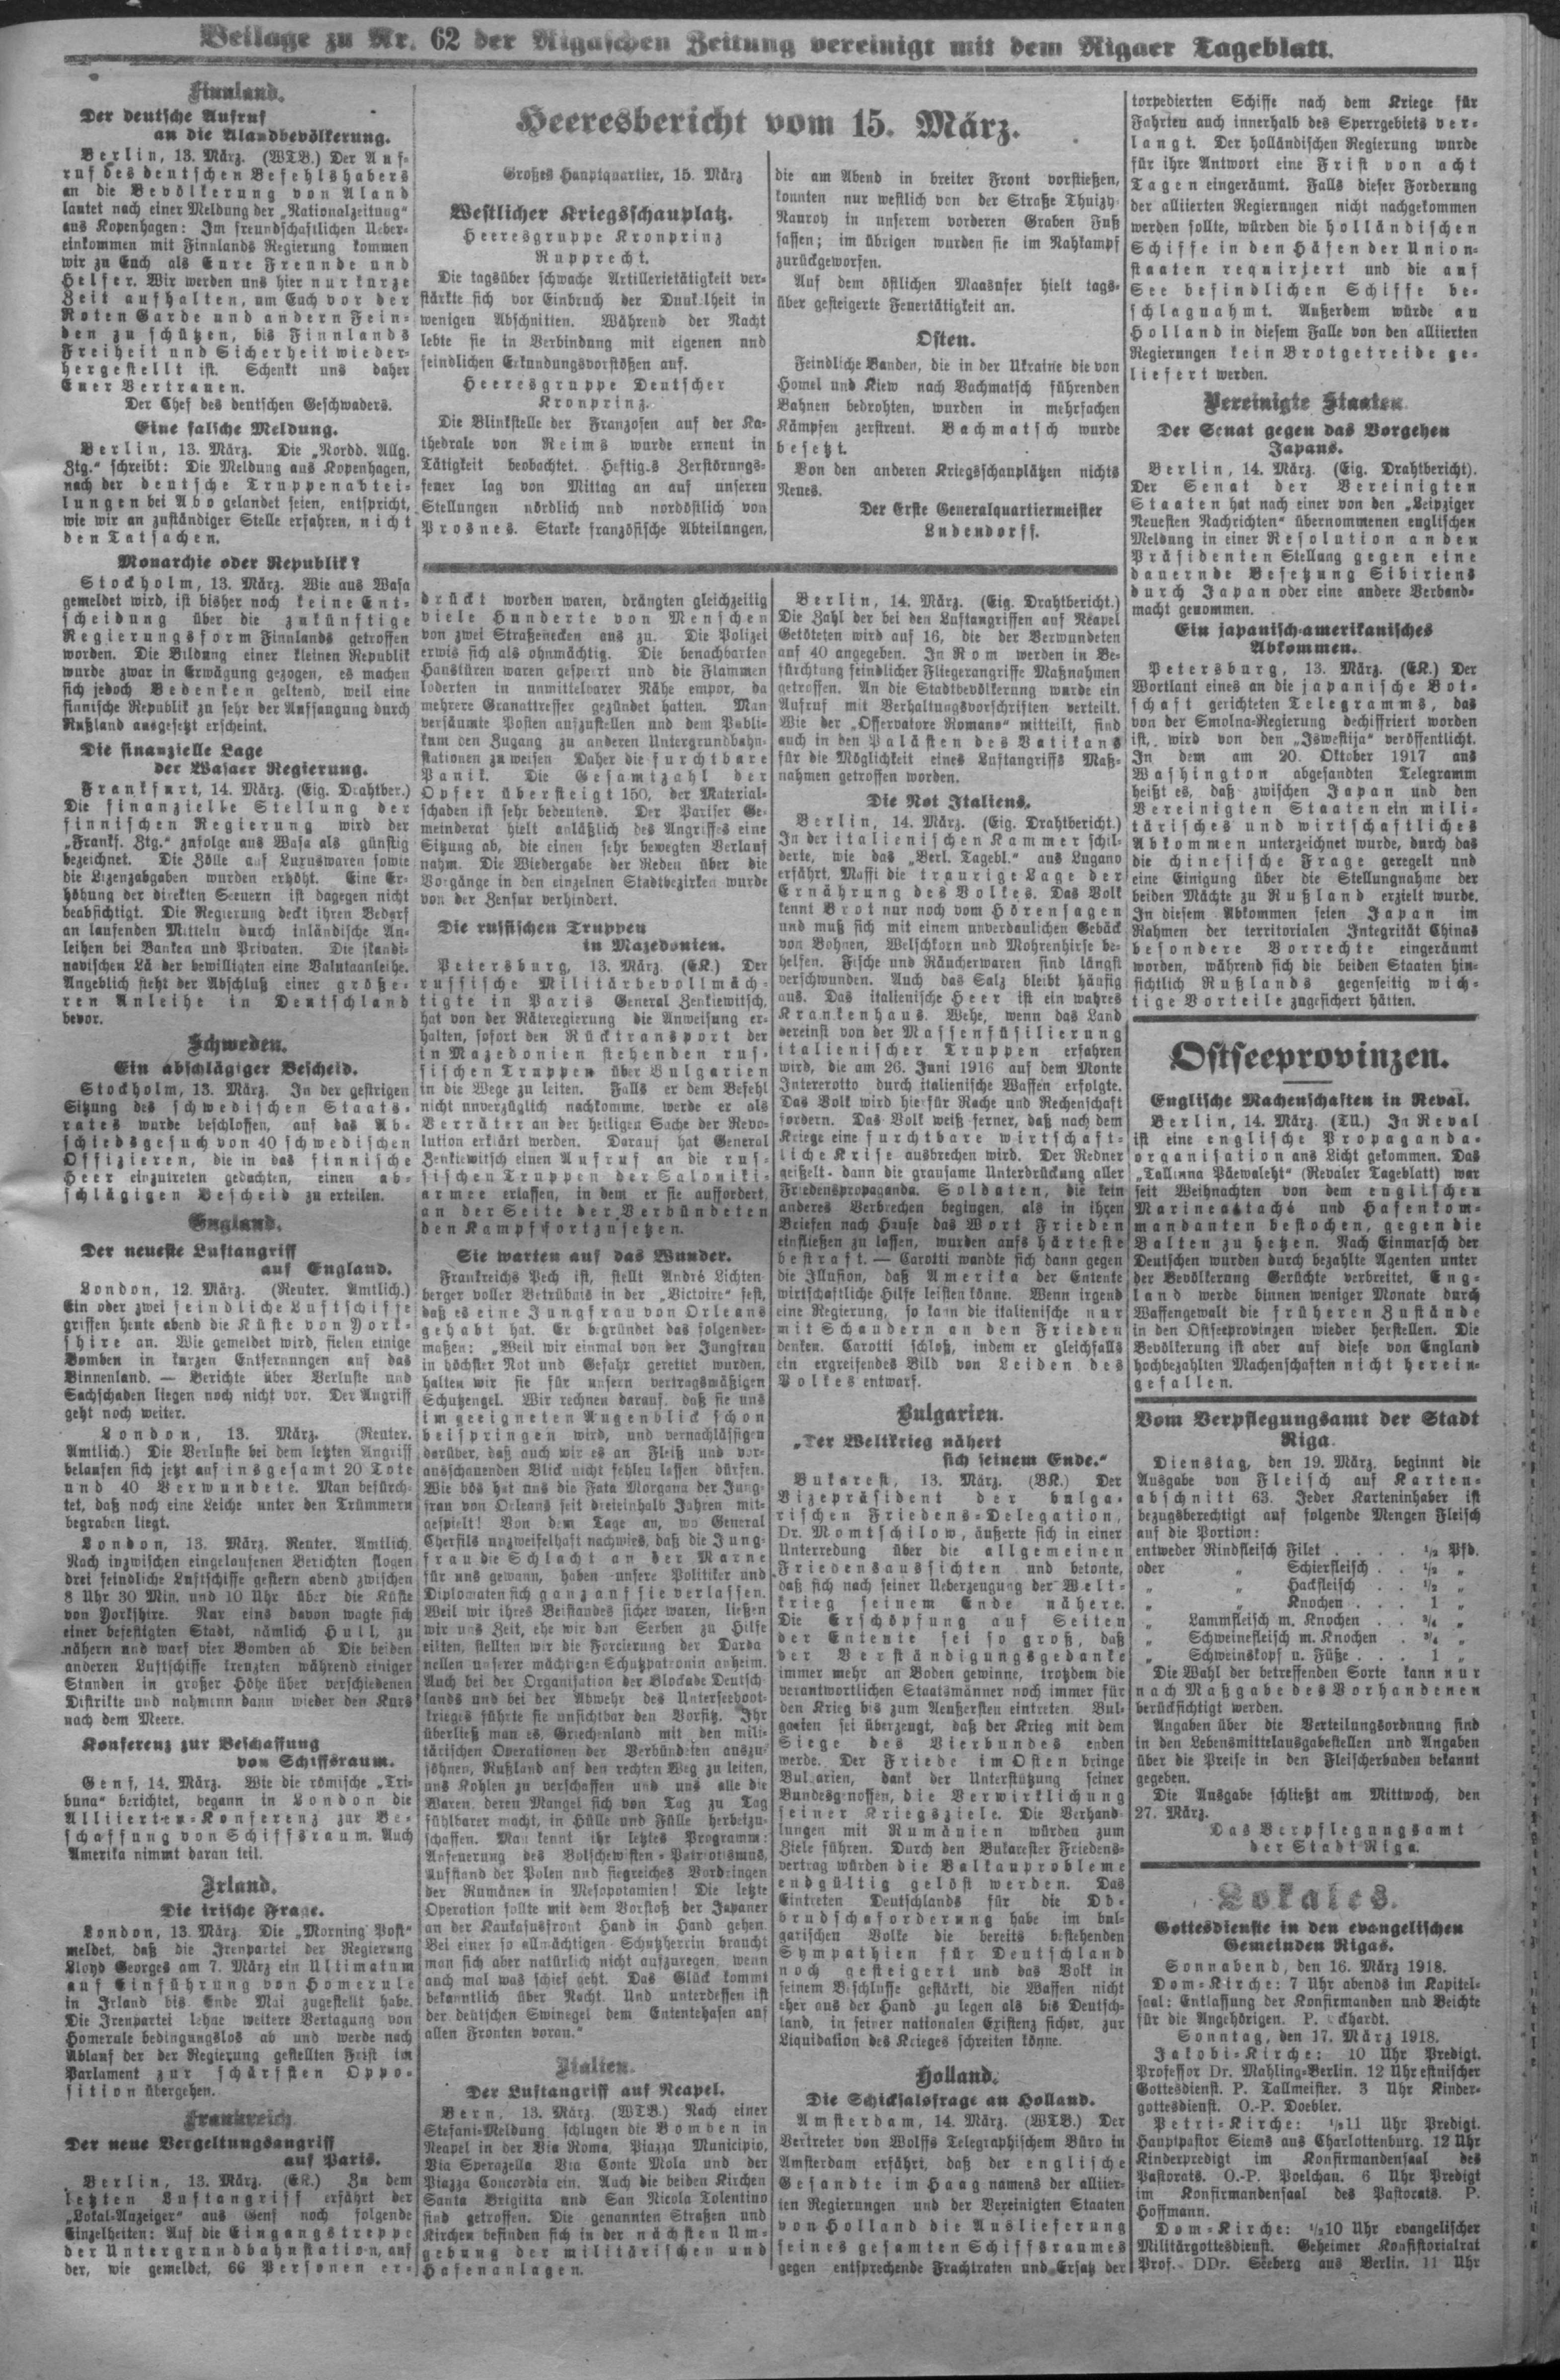

In [10]:
# let's display the image that corresponds to the first page of this issue
from IPython.display import Image, display
image_files = list(issue_dir.glob("*.jpg")) + list(issue_dir.glob("*.png"))
if image_files:
    first_image = image_files[0]
    print(f"📷 Displaying first image: {first_image.name}")
    display(Image(filename=str(first_image)))

## 🧾 Scan Quality Analysis: *Rigasche Zeitung*, 15. März 1918

### 📜 General Information
- **Title:** *Rigasche Zeitung*, merged with *Rigaer Tageblatt*
- **Date:** Friday, 15 March 1918
- **Edition:** Nr. 62
- **Language:** German (Fraktur script)
- **Historical Context:** Published during World War I, likely under German occupation or influence in the Baltic region.

---

### 🖼️ Image and Scan Quality

#### 1. Resolution and Sharpness
- ✅ High resolution — text remains legible even under zoom.
- ✅ Fine details of the Fraktur typeface are preserved.
- ✅ Likely scanned at 300–600 DPI.

#### 2. Contrast and Tonal Balance
- ✅ Good contrast between black ink and aged paper.
- ✅ No overexposure or excessive shadows.
- ✅ Letters are clear without smudging or blur.

#### 3. Paper Condition (Visible Signs)
- ✅ Paper is well-preserved with minimal yellowing.
- ⚠️ Slight aging visible near the edges, typical for over-100-year-old acid-based paper.
- ❌ No visible foxing, tears, folds, or water damage.

#### 4. Margins and Cropping
- ✅ Margins present on all sides — no loss of content.
- ✅ Cropping is clean and consistent across the page.

#### 5. Compression Artifacts / Noise
- ✅ No compression artifacts or pixelation.
- ✅ Low digital noise, indicating high-quality scan and post-processing.

#### 6. Alignment and Orientation
- ✅ Perfectly aligned vertically and horizontally.
- ✅ No skewing — columns and rows are straight and easily segmentable.

## Testing possible improvements to older OCR

We know from our library metadata that this OCR was done on older Abbyy FineReader 9.0 software, which is known to have lower accuracy than modern OCR systems. It sometimes struggles with scripts like Fraktur, which was commonly used in German (and Latvian!) publications until early 20th century.

### Ideas to test

* Translating the text to modern German using LLMs
* Translating the text to modern English using LLMs
* Translating the text to modern Latvian using LLMs - most challenging for current models.
* Using multi-modal LLMs to improve OCR quality by combining text and image inputs - time allowing, we can test this as well.

## Setting up LLM API

Again we will need to load our API key and set up the OpenRouter API client. This will allow us to make requests to the LLMs for text processing, translation, and error correction tasks.

Note: In most projects, I would separate common functions into its own module, but for the purposes of this workshop, we will keep nearly identical code in multiple notebooks for simplicity.

```python



In [16]:
# let's try loading open_router_api_key first from system environment variables,
#  then from .env file
# and finally we will prompt user to enter it manually if not found
import getpass # standard library for secure input handling

import os # we already imported this, but let's do it again for clarity - it is cached so no harm done

open_router_api_key = getpass.getpass("Please enter your OpenRouter API key: ")

# we now should have the OpenRouter API key available
if open_router_api_key:
    print("OpenRouter API key loaded successfully.")

# key point we do not print it publicly it is stored as a variable under the name open_router_api_key - of course you can change the name to something more descriptive
# but do not print it to the console or logs, as it is sensitive information

Please enter your OpenRouter API key: ··········
OpenRouter API key loaded successfully.


In [12]:
# let's define a generic function for OpenRouter API requests
# it should have tshould define a new function get_openrouter_response it should have following parameters system_prompt, user_prompt,
#  model defaulting to ChatGPT 3.5 and finally api_key which defaults to open_router_api_key .
#  The function get_openrouter_response should function just like analyze_latvian_text_with_openrouter except with parameters.
import requests  # we need to import requests to make API calls

def get_openrouter_response(system_prompt, user_prompt,
                            model="google/gemini-2.5-flash",
                            api_key=open_router_api_key,
                            max_tokens=4096,
                            temperature=0.5,):
    """
    Generic function to make requests to OpenRouter API with specified parameters.

    :param system_prompt: The system prompt to guide the model's behavior.
    :param user_prompt: The user query or text to analyze.
    :param model: The model to use for the request (default is GPT-3.5).
    :param api_key: The OpenRouter API key (default is loaded from environment).
    :return: The response from the OpenRouter API.
    """

    # Set up the API endpoint and headers
    url = "https://openrouter.ai/api/v1/chat/completions"

    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "HTTP-Referer": "https://www.digitalhumanities.lv/bssdh/2025/",  # Your project URL
        "X-Title": "BSSDH 2025 LLM Workshop - Generic OpenRouter Request"
    }

    # Create the request payload
    request_data = {
        "model": model,
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": 0.9
    }

    # Make the API request
    try:
        response = requests.post(url, headers=headers, json=request_data, timeout=30)
        response.raise_for_status()

        result = response.json()

        if 'choices' in result and len(result['choices']) > 0:
            return result['choices'][0]['message']['content']

        else:
            print("❌ Error: No response returned from the API")
            return None

    except requests.exceptions.RequestException as e:
        print(f"❌ Request Error: {e}")
        return None

## Translation prompts

Let's create some system prompts for translation tasks. These prompts will guide the LLMs in translating the historical text from German to modern languages, while also correcting any OCR errors.

In [13]:
# let's first create prompt for translating historical German text to modern German
system_prompt_german = (
    "You are a highly advanced language model specialized in historical text analysis. "
    "Your task is to translate historical German text from the early 20th century into modern German, "
    "while correcting any OCR errors and maintaining the original meaning and context. "
    "Pay special attention to Fraktur script and other historical nuances."
)
# let's test the translation prompt with the first text file from our issue
if issue_files:
    first_file = sorted(issue_files)[0]
    print(f"📄 Translating first text file: {first_file.name}")

    with first_file.open('r', encoding='utf-8') as f:
        first_file_content = f.read()

    # Now we can use our get_openrouter_response function to translate the text
    translated_text = get_openrouter_response(
        system_prompt=system_prompt_german,
        user_prompt=first_file_content,
        model="google/gemini-2.5-flash-lite"
    )

    if translated_text:
        print(f"📜 Translated text (first 1500 characters):\n{translated_text[:1500]}")
    else:
        print("❌ Translation failed or returned no content.")

📄 Translating first text file: rzei1918s01n062_001_plaintext_s02.txt
📜 Translated text (first 500 characters):
Absolut! Hier ist die Übersetzung des historischen deutschen Textes ins moderne Deutsch, unter Berücksichtigung von OCR-Korrekturen und der Beibehaltung des ursprünglichen Sinns und Kontexts:

**Titel: Ein verständiges Urteil.**

Denjenigen, die am **Brester Frieden** mit der Begründung Kritik üben, er werde in Russland Rachegefühle auslösen, schreibt der sozialdemokratische Reichstagsabgeordnete **v. Leesen** in der »Glocke« einige beachtenswerte Zeilen ins Stammbuch.

„An einen künftigen „Reva


### German to English Translation Prompt

Now let's create a similar prompt for translating original German text to modern English. This will help us understand how well the LLM can handle historical language and OCR errors.
```python

In [17]:
# let's create a similar prompt for translating original German text to modern English
system_prompt_english = (
    "You are a highly advanced language model specialized in historical text analysis. "
    "Your task is to translate original German text from the early 20th century into modern English, "
    "while correcting any OCR errors and maintaining the original meaning and context. "
    "Pay special attention to Fraktur script and other historical nuances."
)
# Now let's test the English translation prompt with the same text
if issue_files:
    first_file = sorted(issue_files)[0]
    print(f"📄 Translating first text file to English: {first_file.name}")

    with first_file.open('r', encoding='utf-8') as f:
        first_file_content = f.read()

    # Now we can use our get_openrouter_response function to translate the text
    translated_text_english = get_openrouter_response(
        system_prompt=system_prompt_english,
        user_prompt=first_file_content,
        model="google/gemini-2.5-flash-lite"
    )

    if translated_text_english:
        print(f"📜 Translated text (first 1500 characters):\n{translated_text_english[:1500]}")
    else:
        print("❌ Translation failed or returned no content.")

📄 Translating first text file to English: rzei1918s01n062_001_plaintext_s01.txt
📜 Translated text (first 500 characters):
Here is the translation of the provided German text into modern English, with corrections for OCR errors and a focus on maintaining the original meaning and context:

**Title: The Liberation of Reval**

The war correspondent of the "Lokalanzeiger," Eronheim, reports on the liberation of Reval:

Since the days when the Great Elector crossed the Haff with his war-hardened troops, history has not witnessed a similar undertaking to this daring, arduous, and perilous deed. It began on the islands of 


### German to Latvian Translation Prompt

Now let's create a similar prompt for translating original German text to modern Latvian. This will help us understand how well the LLM can handle historical language and OCR errors, especially in a less common language pair.

We have to be ready that translation might not actually be perfect especially on less expensive models, but we can still test how well the LLM can handle historical language and OCR errors.
```python

In [18]:
# let's create a similar prompt for translating original German text to modern Latvian
system_prompt_latvian = (
    "You are a highly advanced language model specialized in historical text analysis. "
    "Your task is to translate original German text from the early 20th century into modern Latvian, "
    "while correcting any OCR errors and maintaining the original meaning and context. "
    "Pay special attention to Fraktur script and other historical nuances."
)
# Now let's test the Latvian translation prompt with the same text
if issue_files:
    first_file = sorted(issue_files)[0]
    print(f"📄 Translating first text file to Latvian: {first_file.name}")

    with first_file.open('r', encoding='utf-8') as f:
        first_file_content = f.read()

    # Now we can use our get_openrouter_response function to translate the text
    translated_text_latvian = get_openrouter_response(
        system_prompt=system_prompt_latvian,
        user_prompt=first_file_content,
        model="google/gemini-2.5-flash" # we want to use flash model for better quality translations
    )

    if translated_text_latvian:
        print(f"📜 Translated text (first 1500 characters):\n{translated_text_latvian[:1500]}")
    else:
        print("❌ Translation failed or returned no content.")

📄 Translating first text file to Latvian: rzei1918s01n062_001_plaintext_s01.txt
📜 Translated text (first 500 characters):
Šis ir modernizēts tulkojums ar OCR kļūdu labojumiem un konteksta saglabāšanu.

**Rēveles atbrīvošana.**

Par Rēveles atbrīvošanu ziņo "Vossische Anzeiger" kara korespondents Eronheims:

Kopš dienām, kad Lielais kūrfirsts ar saviem karapulkiem pāri Hāfam devās, vēsture nav redzējusi līdzīgu uzņēmumu kā drosmīgais, grūtais un bīstamais darbs, kas sākās Dago un Mūnas salās un beidzās ar Vācu tautības ziemeļnieciskākās pilsētas ieņemšanu un sagrābšanu Somu līcī, kas atrodas Stokholmas un Pēterburga


### Early takeways from translation tests

Even for those that do not speak German, the translation results can be quite impressive. The LLMs are able to handle historical language and OCR errors to a certain extent, but there are still challenges, especially with less common language pairs like German to Latvian.

Another point to note is that even in places where text is not perfect or missing some characters, the LLMs can still provide a reasonable translation. This shows their robustness in handling imperfect inputs, which is crucial for historical texts where OCR errors are common.

There might never be perfect certainty in translation, especially with historical texts, but the LLMs can still provide valuable insights and corrections that improve our understanding of the original content.
